In [2]:
# Setup Python path and imports
import sys
from pathlib import Path

# Add the project root to Python path
project_root = Path(__file__).parent.parent if '__file__' in globals() else Path.cwd().parent
sys.path.append(str(project_root))

# ML toolbox imports
from ml_toolbox.data_loader import DatasetManager, DataLoader

# Initialize dataset manager
dataset_path = project_root / "data_set"
dm = DatasetManager(dataset_path)

# Initialize data loader 
data_loader = DataLoader(dataset_path)

# Get dataset index and statistics
index = dm.get_index()
stats = dm.get_statistics()

print(f"Available conditions: {index['conditions']}")
print(f"Available frequencies: {index['frequencies']}")
print(f"Available loads: {index['loads']}")
print(f"Total files: {stats['total_files']}")

Available conditions: ['faulty_bearing', 'healthy', 'misalignment', 'system_misalignment']
Available frequencies: ['10hz', '20hz', '30hz', '40hz']
Available loads: ['no_load', 'under_load']
Total files: 134


In [ ]:
# Import the new analysis modules
from ml_toolbox.analysis import (
    run_comprehensive_frequency_analysis,
    plot_feature_importance_comparison, 
    compare_top_features_across_frequencies
)

# Define frequencies to analyze
frequencies_to_analyze = ["20hz", "30hz"]
max_windows_per_class = 50
window_length = 2048

print(f"Analysis Configuration:")
print(f"  Frequencies: {frequencies_to_analyze}")
print(f"  Load condition: no load")
print(f"  Max windows per class: {max_windows_per_class}")
print(f"  Window length: {window_length} samples")
print(f"  Total expected windows: ~{max_windows_per_class * len(frequencies_to_analyze) * 4} (4 classes)")
print("=" * 60)

Analysis Configuration:
  Frequencies: ['20hz', '30hz']
  Load condition: no load
  Max windows per class: 5
  Window length: 2048 samples
  Total expected windows: ~40 (4 classes)


In [4]:
# Run analysis across all frequencies with configurable window count
cv_results, importance_results = run_comprehensive_frequency_analysis(
    data_loader, 
    frequencies_to_analyze, 
    load="under_load",
    max_windows_per_class=max_windows_per_class,
    window_length=window_length
)

INFO:ml_toolbox.data_loader.data_loader:Loading 7 files with 1 workers
INFO:ml_toolbox.data_loader.data_loader:Successfully loaded 7 files
INFO:ml_toolbox.data_loader.windowing:Class 'faulty_bearing': extracted 5 windows
INFO:ml_toolbox.data_loader.windowing:Class 'misalignment': extracted 5 windows
INFO:ml_toolbox.data_loader.windowing:Class 'system_misalignment': extracted 5 windows
INFO:ml_toolbox.data_loader.feature_extraction:Processed 0/15 windows


Starting comprehensive analysis for frequencies: ['20hz', '30hz']
Load condition: under_load
Max windows per class: 5
Loading 20hz under_load data...
Loaded 7 current sensor files for 20hz
Created 15 windows for 20hz


INFO:ml_toolbox.data_loader.feature_extraction:Extracted 112 features from 15 windows
INFO:ml_toolbox.data_loader.feature_extraction:  - Signal features: 110
INFO:ml_toolbox.data_loader.feature_extraction:  - Categorical features: 2


Extracted 112 features for 20hz
Evaluating model for 20hz...
20hz - Mean CV Accuracy: 0.733 ± 0.133
Computing feature importance for 20hz...


INFO:ml_toolbox.data_loader.data_loader:Loading 7 files with 1 workers
INFO:ml_toolbox.data_loader.data_loader:Successfully loaded 7 files
INFO:ml_toolbox.data_loader.windowing:Class 'faulty_bearing': extracted 5 windows
INFO:ml_toolbox.data_loader.windowing:Class 'misalignment': extracted 5 windows
INFO:ml_toolbox.data_loader.windowing:Class 'system_misalignment': extracted 5 windows
INFO:ml_toolbox.data_loader.feature_extraction:Processed 0/15 windows
INFO:ml_toolbox.data_loader.feature_extraction:Extracted 112 features from 15 windows
INFO:ml_toolbox.data_loader.feature_extraction:  - Signal features: 110
INFO:ml_toolbox.data_loader.feature_extraction:  - Categorical features: 2


20hz analysis completed
Loading 30hz under_load data...
Loaded 7 current sensor files for 30hz
Created 15 windows for 30hz
Extracted 112 features for 30hz
Evaluating model for 30hz...
30hz - Mean CV Accuracy: 1.000 ± 0.000
Computing feature importance for 30hz...
30hz analysis completed
Analysis completed for 2 frequencies


PERFORMANCE SUMMARY ACROSS FREQUENCIES
Frequency  Mean_Accuracy  Std_Accuracy  Best_Fold  Worst_Fold  Stability_Score  N_Samples  N_Features
     30hz       1.000000      0.000000        1.0    1.000000      100000000.0         15         112
     20hz       0.733333      0.133333        1.0    0.666667              5.5         15         112

COMPREHENSIVE CROSS-VALIDATION ANALYSIS


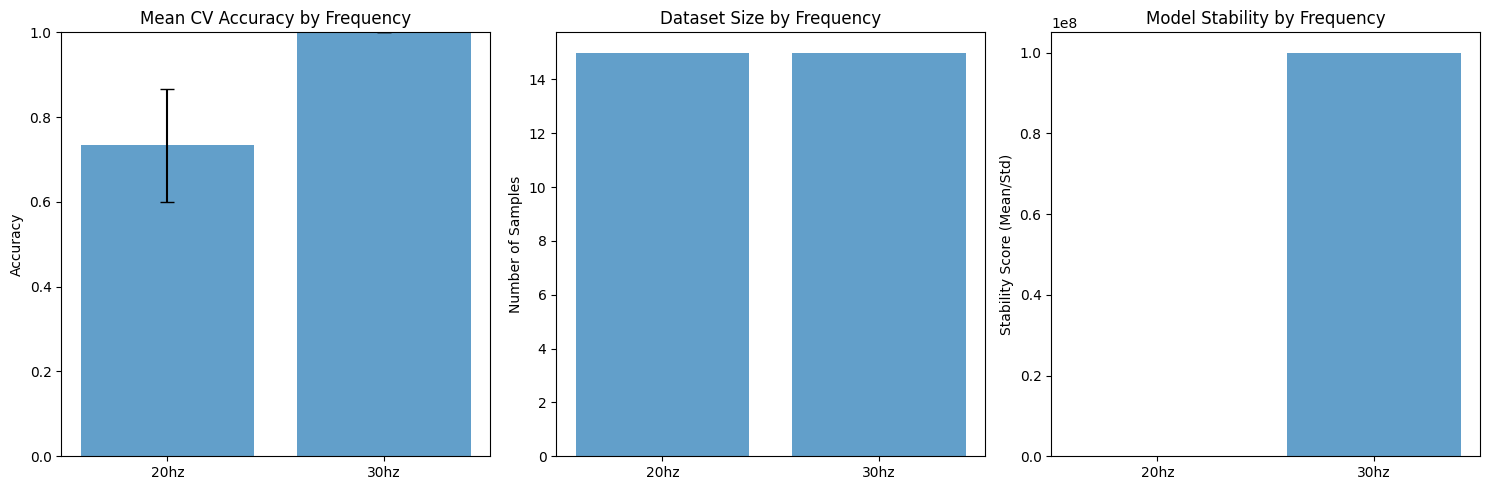


FREQUENCY PERFORMANCE TRENDS


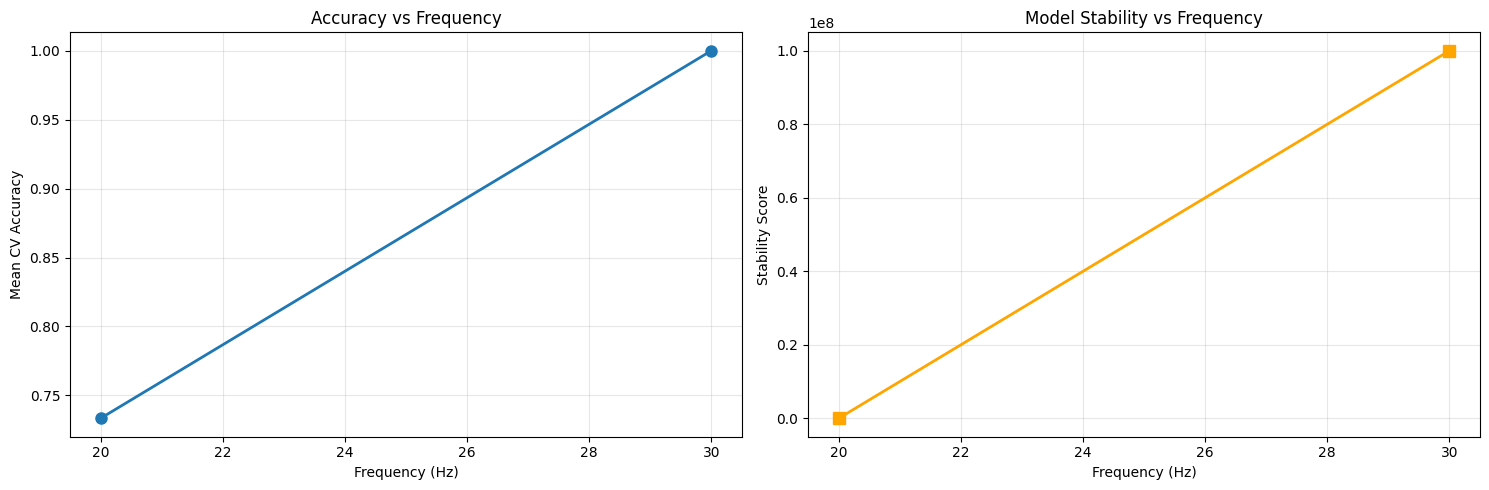


FREQUENCY ANALYSIS INSIGHTS:
Best accuracy: 30Hz (1.000)
Most stable: 30Hz (stability: 100000000.00)
Accuracy trend: increasing with frequency


In [5]:
# Display comprehensive results
from ml_toolbox.analysis import (
    plot_cv_results_comparison, 
    create_performance_summary,
    analyze_frequency_performance_trends
)

# 1. Performance Summary Table
print("PERFORMANCE SUMMARY ACROSS FREQUENCIES")
print("=" * 60)
performance_summary = create_performance_summary(cv_results)
print(performance_summary.to_string(index=False))

# 2. Plot comprehensive CV results comparison
print("\nCOMPREHENSIVE CROSS-VALIDATION ANALYSIS")
plot_cv_results_comparison(cv_results)

# 3. Analyze performance trends
print("\nFREQUENCY PERFORMANCE TRENDS")
analyze_frequency_performance_trends(cv_results)

DETAILED CV SCORES BY FOLD FOR EACH FREQUENCY


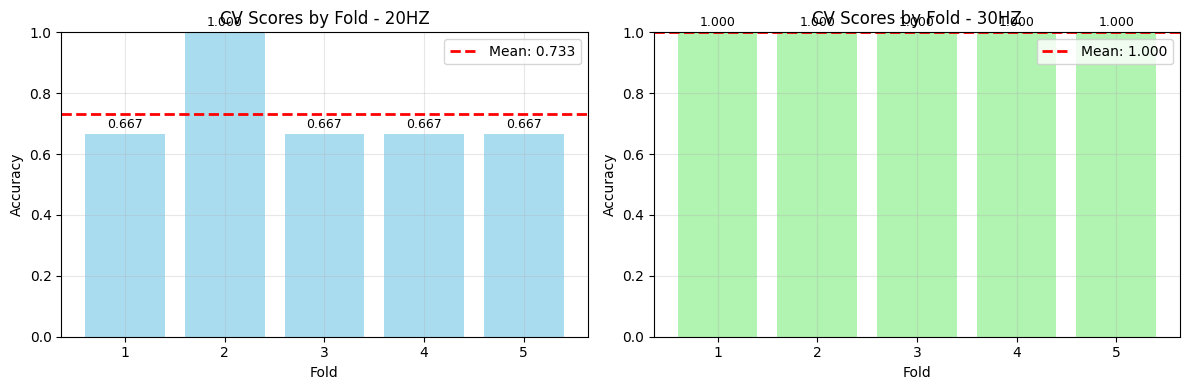

In [6]:
# Improved CV Scores Visualization
from ml_toolbox.analysis import plot_cv_scores_by_fold

print("DETAILED CV SCORES BY FOLD FOR EACH FREQUENCY")
print("=" * 60)
plot_cv_scores_by_fold(cv_results)

FEATURE IMPORTANCE COMPARISON

TOP 10 FEATURES for 20HZ:
   1. current_phase_a_peak_magnitude | 0.0327 ± 0.0038
   2. current_phase_a_band_1_0_50hz_std | 0.0326 ± 0.0021
   3. current_phase_a_spectral_flux | 0.0284 ± 0.0092
   4. current_phase_b_band_4_2000_5000hz_peak | 0.0282 ± 0.0068
   5. current_phase_b_rms       | 0.0275 ± 0.0064
   6. current_phase_a_band_1_0_50hz_energy | 0.0270 ± 0.0076
   7. current_phase_b_var       | 0.0264 ± 0.0029
   8. current_phase_a_iqr       | 0.0262 ± 0.0094
   9. current_phase_a_percentile_25 | 0.0262 ± 0.0058
  10. current_phase_a_band_3_500_2000hz_power_ratio | 0.0261 ± 0.0060

TOP 10 FEATURES for 30HZ:
   1. current_phase_b_band_3_500_2000hz_peak | 0.0358 ± 0.0011
   2. current_phase_b_peak_magnitude | 0.0301 ± 0.0016
   3. current_phase_a_band_1_0_50hz_std | 0.0290 ± 0.0055
   4. current_phase_a_current_phase_b_correlation | 0.0289 ± 0.0072
   5. current_phase_b_var       | 0.0287 ± 0.0034
   6. current_phase_b_band_4_2000_5000hz_peak | 0.0276 ±

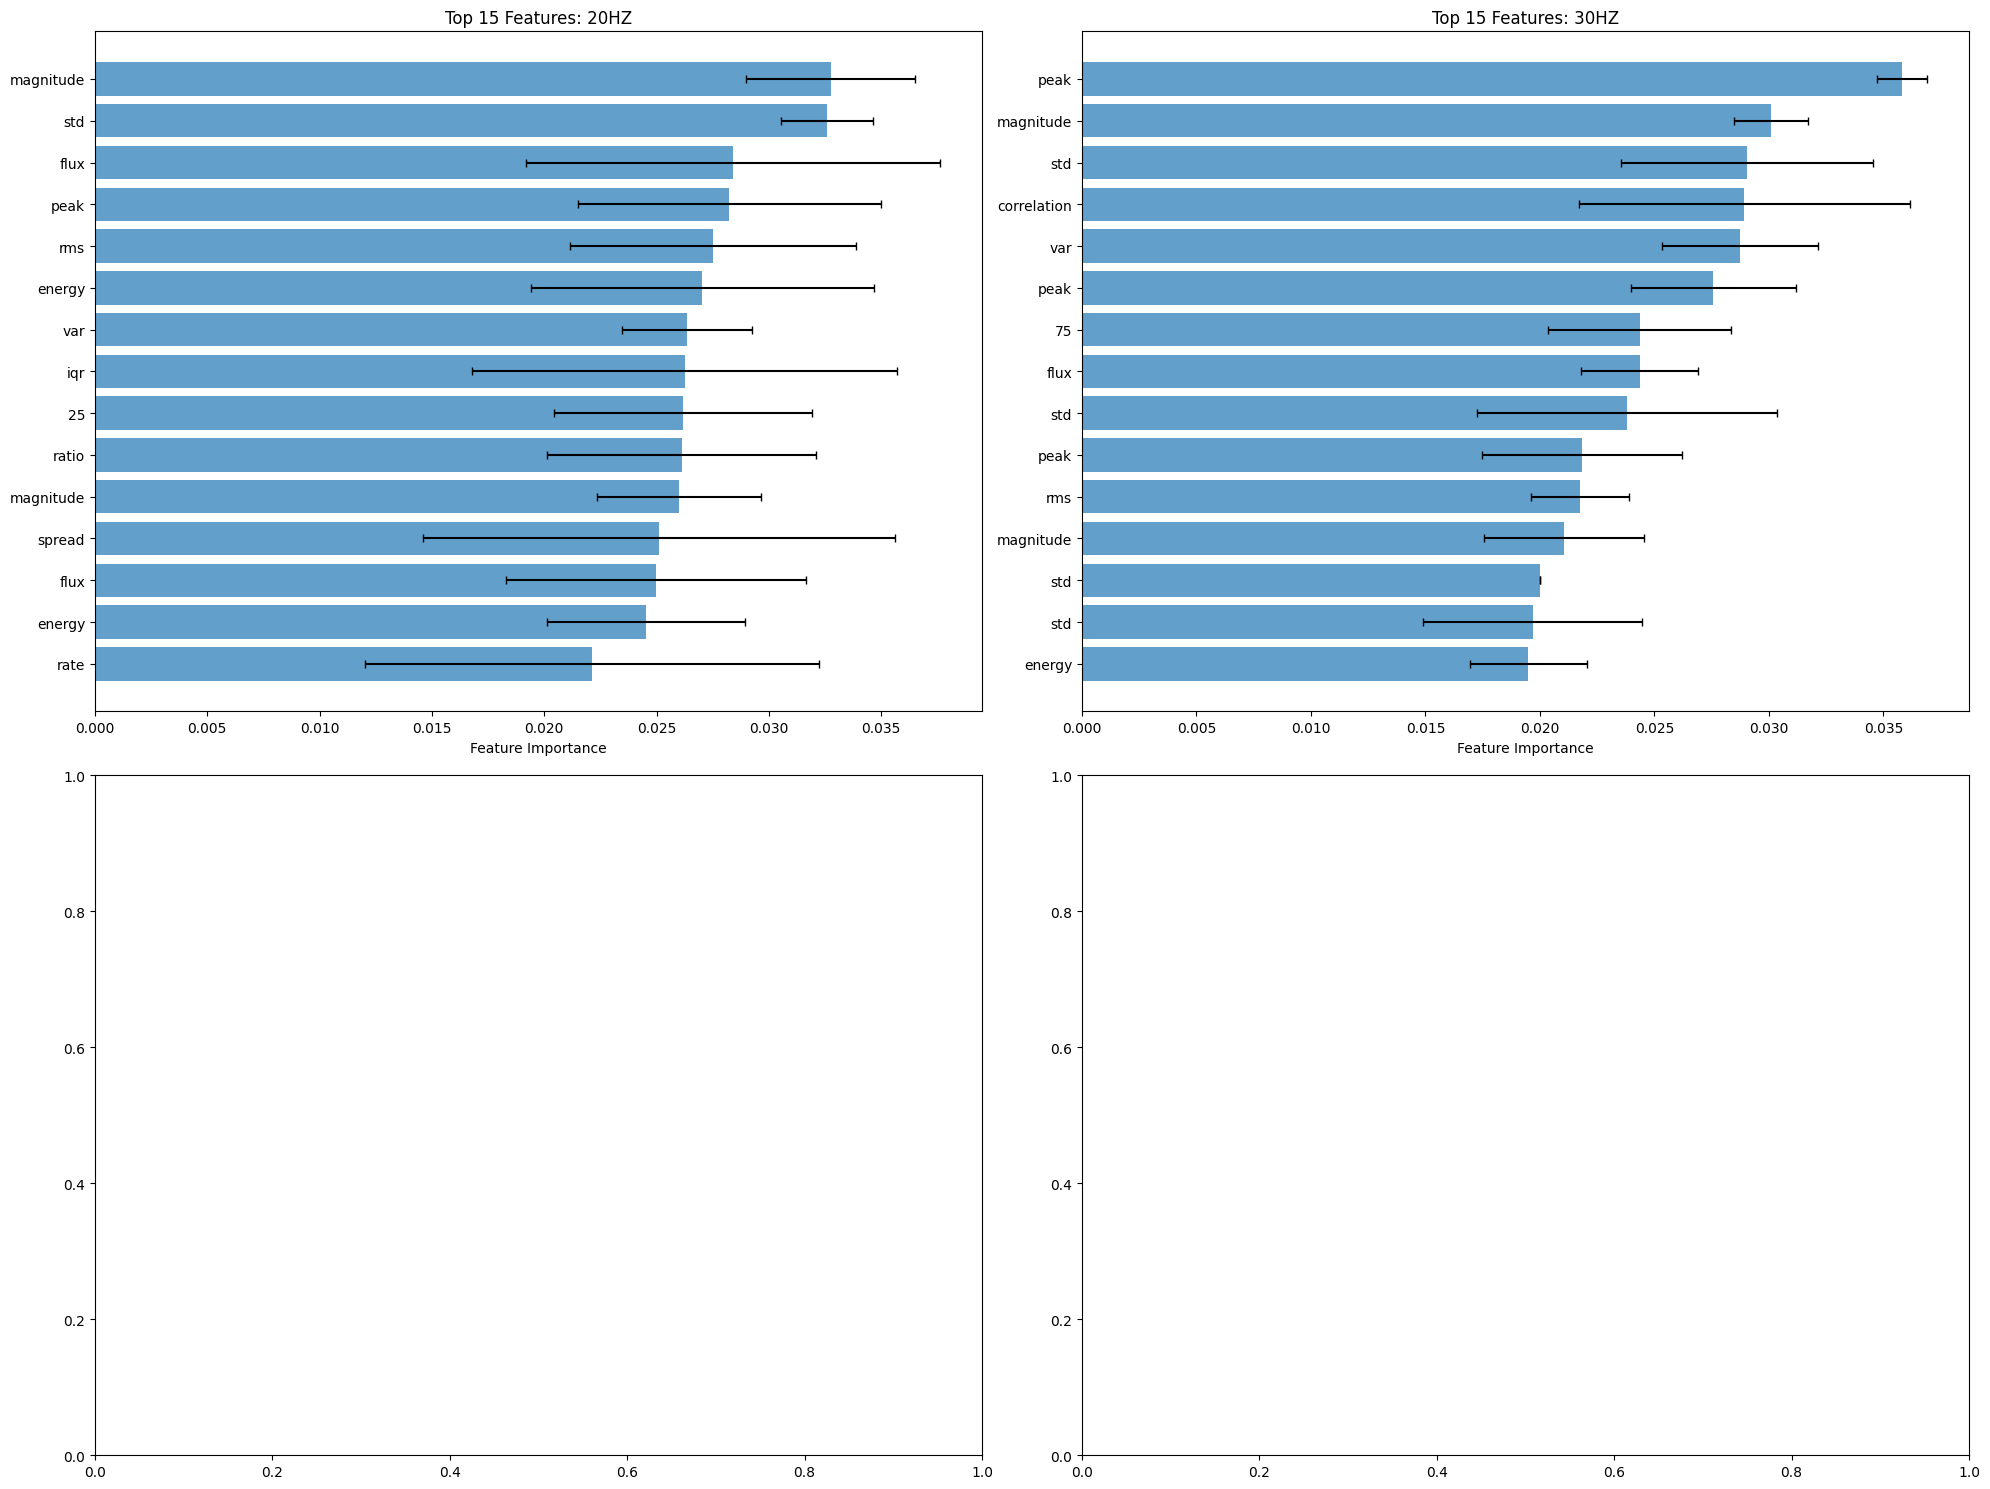


CROSS-FREQUENCY FEATURE RANKING


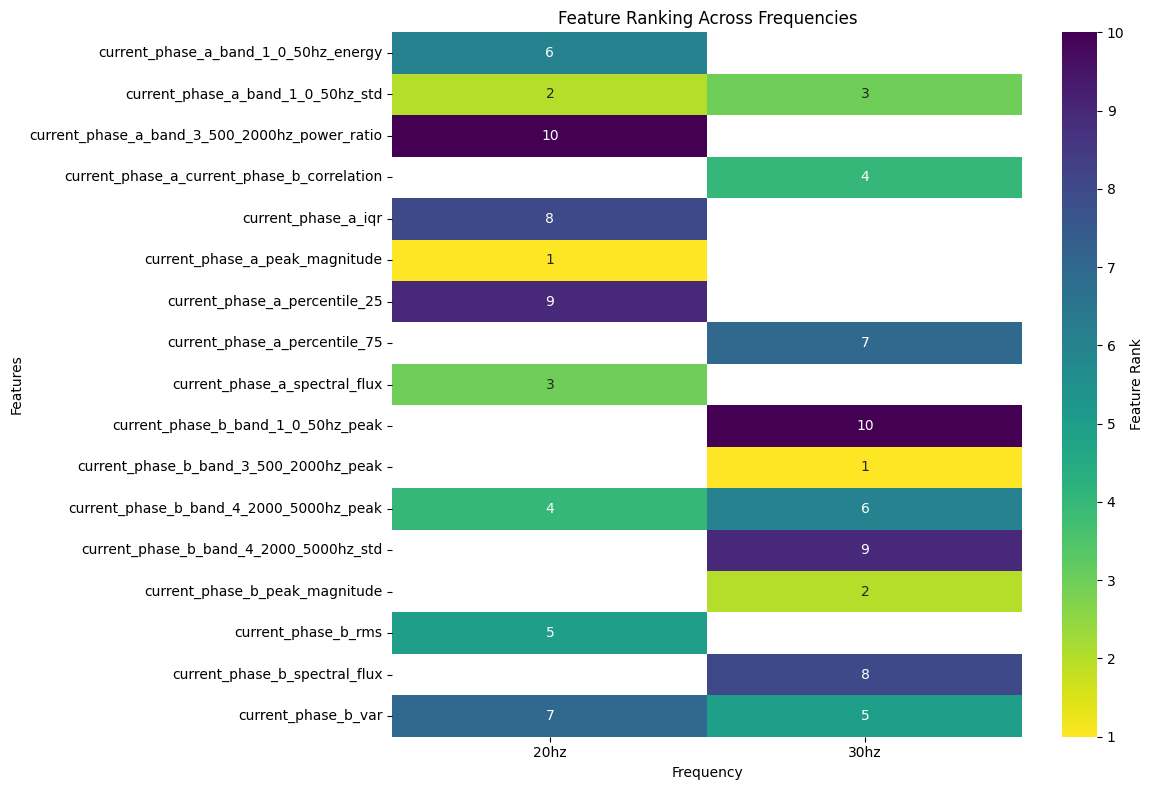

In [7]:
# Feature importance comparison across frequencies
print("FEATURE IMPORTANCE COMPARISON")
print("=" * 60)

# 1. Show top features for each frequency
for freq in frequencies_to_analyze:
    if freq in importance_results:
        print(f"\nTOP 10 FEATURES for {freq.upper()}:")
        top_10 = importance_results[freq].head(10)
        for i, (_, row) in enumerate(top_10.iterrows(), 1):
            print(f"  {i:2d}. {row['Feature']:<25} | {row['Mean_Importance']:.4f} ± {row['Std_Importance']:.4f}")

# 2. Plot feature importance comparison
print(f"\nFEATURE IMPORTANCE VISUALIZATION")
plot_feature_importance_comparison(importance_results, top_n=15)

# 3. Compare top features across frequencies
print(f"\nCROSS-FREQUENCY FEATURE RANKING")
comparison_df = compare_top_features_across_frequencies(importance_results, top_n=10)